In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

In [2]:
a = 1 # Coefficient a "Tortusity"
Rw = 0.04 # Water resistivity at formation temperature
m = 1.8 # Slope Sw Picket Plot
n = 2 # Assumption
c1 = 0.45 # Constant capillary pressure equation
c2 = 250 # Constant permeability equation
c3 = 2.1 # Constant permeability equation
c4 = 2 # Constant permeability equation
c5 = 19.5 # Constant capillary pressure equation
c6 = 1.7 # Constant capillary pressure equation

Sw_1 = 1 #Water saturation = 100%
Sw_50 = 0.5 #Water saturation = 50%
Sw_25 = 0.25 #Water saturation = 25%

CPS_20k = 20000 #Process speed constant = k / porosity = 20000
CPS_2k = 2000 #Process speed constant = k / porosity = 2000
CPS_200 = 200 #Process speed constant = k / porosity = 200
CPS_20 = 20 #Process speed constant = k / porosity = 20

In [3]:
data = {'Porosity': [0.01,1]}
df = pd.DataFrame(data)
df.head()

,Porosity
0,0.01
1,1.00


In [4]:
def Rt (a,Rw,m,n,Sw,Porosity):
    x = - np.log(Sw)*n -m*np.log(Porosity) + np.log(a*Rw)
    Rt = np.exp(x)
    return Rt

In [5]:
df['Rt_at_Sw_1'] = Rt(a,Rw,m,n,Sw_1,df['Porosity'])
df['Rt_at_Sw_25'] = Rt(a,Rw,m,n,Sw_25,df['Porosity'])
df['Rt_at_Sw_50'] = Rt(a,Rw,m,n,Sw_50,df['Porosity'])

df.head()

,Porosity,Rt_at_Sw_1,Rt_at_Sw_25,Rt_at_Sw_50
0,0.01,159.242868,2547.885892,636.971473
1,1.00,0.040000,0.640000,0.160000


In [6]:
data2 = {'ZONE': ['1','2','3','4','5','A'],
        'Rt':[4,3.1,2.2,1,3.5,10],
        'PHI':[0.176,0.21,0.17,0.16,0.06,0.048]
        }
df2=pd.DataFrame(data2)

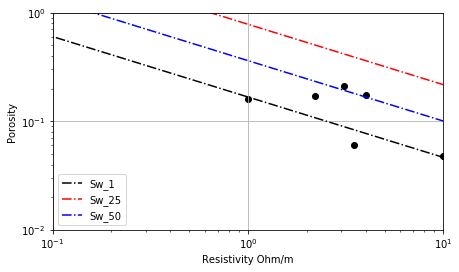

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df['Rt_at_Sw_1'], df['Porosity'],color='black',linestyle= '-.')
ax.plot(df['Rt_at_Sw_25'], df['Porosity'],color='red',linestyle= '-.')
ax.plot(df['Rt_at_Sw_50'], df['Porosity'],color='blue',linestyle= '-.')
ax.scatter(df2['Rt'],df2['PHI'],marker="o",c='black')
ax.set_ylabel("Porosity")
ax.set_xlabel('Resistivity Ohm/m')
ax.legend(['Sw_1','Sw_25','Sw_50'])
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1,10)
plt.ylim(0.01,1)
ax.grid()

### Question 2

m = 1.8

### Question 3

a*Rw = 0.04

### Question 4

In [8]:
def process_speed(a,Rw,m,n,CPS,c2,c3,c4,Porosity):
    Rt = Porosity**(-c2*n -m + (n/c4)) * (a*Rw*(c2**-n)*(CPS**(n/c4)))
    return Rt

In [9]:
df['Rt_at_CPS_20k'] = process_speed(a,Rw,m,n,CPS_20k,c2,c3,c4,df['Porosity'])
df['Rt_at_CPS_2k'] = process_speed(a,Rw,m,n,CPS_2k,c2,c3,c4,df['Porosity'])
df['Rt_at_CPS_200'] = process_speed(a,Rw,m,n,CPS_200,c2,c3,c4,df['Porosity'])
df['Rt_at_CPS_20'] = process_speed(a,Rw,m,n,CPS_20,c2,c3,c4,df['Porosity'])
df.head()

,Porosity,Rt_at_Sw_1,Rt_at_Sw_25,Rt_at_Sw_50,Rt_at_CPS_20k,Rt_at_CPS_2k,Rt_at_CPS_200,Rt_at_CPS_20
0,0.01,159.242868,2547.885892,636.971473,inf,inf,inf,inf
1,1.00,0.040000,0.640000,0.160000,0.0128,0.00128,0.000128,0.000013


The computer represent the answer as inf ! So I will put them manually.

In [10]:
df['Rt_at_CPS_20k'][0] = 128000000
df['Rt_at_CPS_2k'][0] = 12800000
df['Rt_at_CPS_200'][0] = 1280000
df['Rt_at_CPS_20'][0] = 128000

In [11]:
df

,Porosity,Rt_at_Sw_1,Rt_at_Sw_25,Rt_at_Sw_50,Rt_at_CPS_20k,Rt_at_CPS_2k,Rt_at_CPS_200,Rt_at_CPS_20
0,0.01,159.242868,2547.885892,636.971473,1.280000e+08,1.280000e+07,1.280000e+06,128000.000000
1,1.00,0.040000,0.640000,0.160000,1.280000e-02,1.280000e-03,1.280000e-04,0.000013


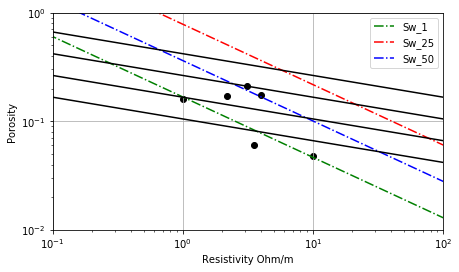

In [16]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df['Rt_at_Sw_1'], df['Porosity'],color='green',linestyle= '-.')
ax.plot(df['Rt_at_Sw_25'], df['Porosity'],color='red',linestyle= '-.')
ax.plot(df['Rt_at_Sw_50'], df['Porosity'],color='blue',linestyle= '-.')
ax.scatter(df2['Rt'],df2['PHI'],marker="o",c='black')
ax.plot(df['Rt_at_CPS_20k'], df['Porosity'],color='black',linestyle= '-')
ax.plot(df['Rt_at_CPS_2k'], df['Porosity'],color='black',linestyle= '-')
ax.plot(df['Rt_at_CPS_200'], df['Porosity'],color='black',linestyle= '-')
ax.plot(df['Rt_at_CPS_20'], df['Porosity'],color='black',linestyle= '-')
ax.set_ylabel("Porosity")
ax.set_xlabel('Resistivity Ohm/m')
ax.legend(['Sw_1','Sw_25','Sw_50'])
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1,100)
plt.ylim(0.01,1)
ax.grid()

### Question 5

In [17]:
def Pc(A,CPS,c1):
    Pc = A*((CPS*0.01)**-c1)
    return Pc
def A(c5,Sw,c6):
    A= c5*(Sw**-c6)
    return A

In [65]:
dx={'Sw':[0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}
dfx=pd.DataFrame(dx)

dfx['A']=A(c5,dfx['Sw'],c6)
dfx['Pc_2000'] = Pc(dfx['A'],CPS_2k,c1)
dfx['Pc_200'] = Pc(dfx['A'],CPS_200,c1)
dfx['Pc_20'] = Pc(dfx['A'],CPS_20,c1)
dfx['Pc_2000'][14]=0
dfx['Pc_200'][14]=0
dfx['Pc_20'][14]=0
ax.set_xscale('log')
ax.set_yscale('log')
dfx

,Sw,A,Pc_2000,Pc_200,Pc_20
0,0.10,977.315106,253.846461,715.436533,2016.374114
1,0.20,300.804008,78.130413,220.201423,620.611931
2,0.30,150.983149,39.216152,110.526134,311.504970
3,0.40,92.583294,24.047455,67.774938,191.015728
4,0.50,63.355687,16.455918,46.379077,130.714000
5,0.55,53.878815,13.994408,39.441602,111.161537
6,0.60,46.470515,12.070187,34.018408,95.876901
7,0.65,40.558502,10.534609,29.690561,83.679371
8,0.70,35.757566,9.287620,26.176070,73.774189
9,0.75,31.800245,8.259751,23.279142,65.609536


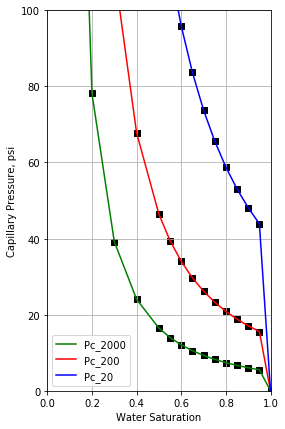

In [67]:
fig, ax = plt.subplots(figsize=(4,7))
ax.plot(dfx['Sw'], dfx['Pc_2000'],color='green',linestyle= '-')
ax.plot(dfx['Sw'], dfx['Pc_200'],color='red',linestyle= '-')
ax.plot(dfx['Sw'], dfx['Pc_20'],color='blue',linestyle= '-')
ax.scatter(dfx['Sw'], dfx['Pc_20'],marker="s",c='black')
ax.scatter(dfx['Sw'], dfx['Pc_200'],marker="s",c='black')
ax.scatter(dfx['Sw'], dfx['Pc_2000'],marker="s",c='black')
ax.set_ylabel("Capillary Pressure, psi")
ax.set_xlabel('Water Saturation')
ax.legend(['Pc_2000','Pc_200','Pc_20'])

plt.xlim(0,1)
plt.ylim(0,100)
ax.grid()